In [1]:
# %load_ext autoreload
# %autoreload 2
# các lệnh sau vào ô đầu tiên của notebook để tự động nạp lại các module khi có thay đổi

%cd /kaggle/working
!git clone https://github.com/Harito97/HaritoProduction.git
# %cd /Data/Projects/HaritoProduction
%cd /kaggle/working/HaritoProduction
!git pull
%matplotlib inline
%pip install -r backend/requirements.txt

/kaggle/working
Cloning into 'HaritoProduction'...
remote: Enumerating objects: 227, done.
remote: Counting objects: 100% (227/227), done.
remote: Compressing objects: 100% (134/134), done.
remote: Total 227 (delta 98), reused 193 (delta 64), pack-reused 0
Receiving objects: 100% (227/227), 5.84 MiB | 31.63 MiB/s, done.
Resolving deltas: 100% (98/98), done.
/kaggle/working/HaritoProduction
Already up to date.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 62.1 MB/s eta 0:00:00:00:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 824.8/824.8 kB 37.4 MB/s eta 0:00:00
  Created wheel for grad-cam: filename=grad_cam-1.5.2-py3-none-any.whl size=38336 sha256=fb9286a5e58bc0253325e3e09c7e8f77fe5f2bedc7de2a15a67a03dbc60bbcc7
  Stored in directory: /root/.cache/pip/wheels/

In [2]:
# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     print(dirname)
!ls /kaggle/input

cell-cluster-detection	cellclassifier	h97_ann  thyroidcancer-ver1


In [1]:
# %pip install wandb

In [1]:
# from backend.app.models.ThyroidCancerClassificationModel import ThyroidCancerClassificationModel
# import numpy as np
# import torch

# model1_path = '/kaggle/input/cell-cluster-detection/pytorch/train300epoches/1/best.pt'
# model2_path = '/kaggle/input/cellclassifier/pytorch/train100epoches/1/best_h97_retrainEfficientNet_B2_B5_B6_dataver3_model.pt'
# model3_path = '/kaggle/input/h97_ann/pytorch/input_is_output_of_model2/1/model_best.pt'

# model = ThyroidCancerClassificationModel(model1_path=model1_path, model2_path=model2_path, model3_path=model3_path)

%cd /Data/Projects/HaritoProduction
from backend.app.models.ThyroidCancerClassificationModel import ThyroidCancerClassificationModel
import numpy as np
import torch

model = ThyroidCancerClassificationModel()

/Data/Projects/venv_manager/ai_work#311/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


/Data/Projects/HaritoProduction
WARNING ⚠️ Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify','pose' or 'obb'.


In [2]:
import wandb

wandb.login()   # 00e43aa49b2b8c17d0db66c858191c6420f4dc9e

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


wandb: Currently logged in as: harito97 (harito). Use `wandb login --relogin` to force relogin


True

Loading /Data/Projects/HaritoProduction/backend/app/models/cell_cluster_detect_300_epoches_best.onnx for ONNX Runtime inference...

image 1/1 /Data/Projects/HaritoProduction/test/backend/app/SmallTest/.B2/z5001983426279_c14a1cce320c0738c6ab383b1e978cae.jpg: 640x640 8 clusters, 54.8ms
Speed: 2.9ms preprocess, 54.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)
/Data/Projects/HaritoProduction/test/backend/app/SmallTest/.B2/z5001983426279_c14a1cce320c0738c6ab383b1e978cae.jpg have 8 cell importance clusters
<class 'numpy.ndarray'> (18, 224, 224, 3) float64
<class 'torch.Tensor'> torch.Size([18, 3]) torch.float32
<class 'torch.Tensor'> torch.Size([1, 3]) torch.float32

image 1/1 /Data/Projects/HaritoProduction/test/backend/app/SmallTest/.B2/z5009963492542_0291c34d8792598aea43c731726feedb.jpg: 640x640 2 clusters, 55.4ms
Speed: 1.6ms preprocess, 55.4ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)
/Data/Projects/HaritoProduction/test/backend/app/SmallTes

test_acc,▁
test_f1,▁
test_acc,0.83333
test_f1,0.82222


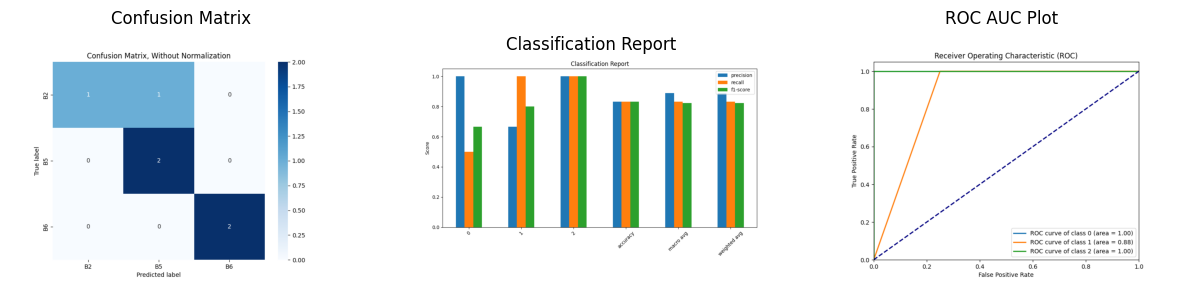

Test accuracy: 0.8333333333333334
Test F1 score: 0.8222222222222223
Classification Report:               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.67      1.00      0.80         2
           2       1.00      1.00      1.00         2

    accuracy                           0.83         6
   macro avg       0.89      0.83      0.82         6
weighted avg       0.89      0.83      0.82         6

Confusion Matrix: [[1 1 0]
 [0 2 0]
 [0 0 2]]


In [3]:
data_dir = "/kaggle/input/thyroidcancer-ver1/dataver1/ver1/test"
data_dir = '/Data/Projects/HaritoProduction/test/backend/app/SmallTest'
test_acc, test_f1, cm, cr, cm_path, cr_path, roc_auc_path = model.test_with_each_part(data_dir, "test")

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

print(f"Test accuracy: {test_acc}")
print(f"Test F1 score: {test_f1}")
# Hiển thị các ảnh
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(mpimg.imread(cm_path))
axs[0].set_title('Confusion Matrix')
axs[0].axis('off')

axs[1].imshow(mpimg.imread(cr_path))
axs[1].set_title('Classification Report')        
axs[1].axis('off')

axs[2].imshow(mpimg.imread(roc_auc_path))
axs[2].set_title('ROC AUC Plot')
axs[2].axis('off')

plt.show()

In [ ]:
data_dir = "/kaggle/input/thyroidcancer-ver1/dataver1/ver1/train"
test_acc, test_f1, cm, cr, cm_path, cr_path, roc_auc_path = model.test_with_each_part(data_dir, "train")

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

print(f"Test accuracy: {test_acc}")
print(f"Test F1 score: {test_f1}")
print(f"Classification Report: {cr}")
# Hiển thị các ảnh
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(mpimg.imread(cm_path))
axs[0].set_title('Confusion Matrix')
axs[0].axis('off')

axs[1].imshow(mpimg.imread(cr_path))
axs[1].set_title('Classification Report')        
axs[1].axis('off')

axs[2].imshow(mpimg.imread(roc_auc_path))
axs[2].set_title('ROC AUC Plot')
axs[2].axis('off')

plt.show()

In [ ]:
data_dir = "/kaggle/input/thyroidcancer-ver1/dataver1/ver1/valid"
test_acc, test_f1, cm, cr, cm_path, cr_path, roc_auc_path = model.test_with_each_part(data_dir, "valid")

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

print(f"Test accuracy: {test_acc}")
print(f"Test F1 score: {test_f1}")
# Hiển thị các ảnh
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(mpimg.imread(cm_path))
axs[0].set_title('Confusion Matrix')
axs[0].axis('off')

axs[1].imshow(mpimg.imread(cr_path))
axs[1].set_title('Classification Report')        
axs[1].axis('off')

axs[2].imshow(mpimg.imread(roc_auc_path))
axs[2].set_title('ROC AUC Plot')
axs[2].axis('off')

plt.show()